In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, auc,make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn import metrics     

In [106]:
df = pd.read_csv('all_genre_5000.csv')

df['hit'] = np.where(df['popularity']>50, 1, 0)
df  = df.drop_duplicates()
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
df.head()

,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,...,popularity,song_genre,popularity_norm,artist_genres,artist_popularity,artist_popularity_norm,full_name,hit,artist_pop_danceability,release_date
0,2VxeLyX666F8uXCJ0dZF8B,https://api.spotify.com/v1/audio-analysis/2Vxe...,215733,0.371,0.572,0.385,0.000000,0.2310,-6.362,0.323,...,89,pop,0.89,"['dance pop', 'pop']",88,0.88,Lady Gaga -- Shallow,1,50.336,2018-10-05
1,4TnjEaWOeW0eKTKIEvJyCa,https://api.spotify.com/v1/audio-analysis/4Tnj...,159382,0.123,0.784,0.430,0.000000,0.0887,-8.756,0.236,...,89,rap,0.89,"['alternative r&b', 'emo rap', 'melodic rap']",78,0.78,Trevor Daniel -- Falling,1,61.152,2018-10-05
2,5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,0.297,0.752,0.488,0.000009,0.0936,-7.050,0.533,...,89,pop,0.89,"['dance pop', 'electropop', 'etherpop', 'indie...",91,0.91,Halsey -- Without Me,1,68.432,2018-10-04
3,3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,0.556,0.760,0.479,0.000000,0.0703,-5.574,0.913,...,89,rap,0.89,"['dfw rap', 'melodic rap', 'rap']",100,1.00,Post Malone -- Sunflower - Spider-Man: Into th...,1,76.000,2018-12-14
4,0e7ipj03S05BNilyu5bRzt,https://api.spotify.com/v1/audio-analysis/0e7i...,218147,0.124,0.585,0.520,0.000070,0.1310,-6.136,0.129,...,89,rap,0.89,"['dfw rap', 'melodic rap', 'rap']",100,1.00,Post Malone -- rockstar (feat. 21 Savage),1,58.500,2018-04-27


In [4]:
df.shape

(47094, 30)

In [5]:
df.groupby('song_genre')['id'].count()

song_genre
classical            4862
folk                 3996
hip-hop              3331
indie pop            3457
indie rock           3579
jazz                 4880
pop                  3422
progressive metal    1916
rap                  2832
rock                 3548
romance               430
salsa                3443
samba                2512
spanish              4886
Name: id, dtype: int64

In [8]:
!pip3 install pandas plotnine
from plotnine import *

  Using cached https://files.pythonhosted.org/packages/aa/ee/9f343ef0719541e02950384978722ea84cc433264cece09a11a0cccb2bf9/plotnine-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/57/29/72ed07818b1cd7f79340d55c7230748238e09c35fc8461c545a5d350006d/mizani-0.7.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bf/a0/f29d1644e74ecac3b86b7135f1f6058050e367568cbc493c981390c8ca34/statsmodels-0.11.1-cp37-cp37m-macosx_10_13_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ca/46/5198aa24e61bb7eef28d06cb69e56bfa1942f4b6807d95a0b5ce361fe09b/palettable-3.3.0-py2.py3-none-any.whl
ERROR: mizani 0.7.1 has requirement pandas>=1.0.0, but you'll have pandas 0.25.3 which is incompatible.
ERROR: plotnine 0.7.0 has requirement pandas>=1.0.3, but you'll have pandas 0.25.3 which is incompa

## Exploratory Data Analysis

/usr/local/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 60'. Pick better value with 'binwidth'.


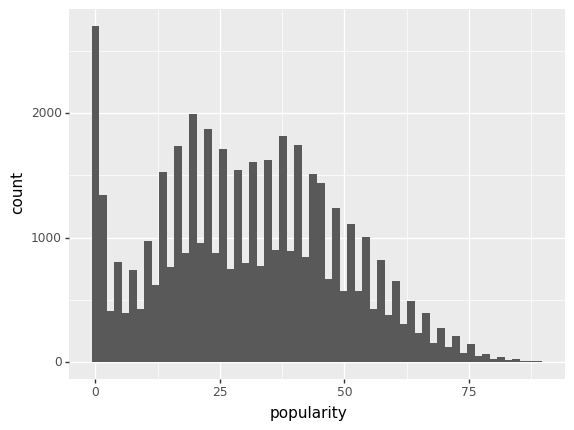

<ggplot: (318986725)>

In [9]:
ggplot(df, aes(x=df.popularity)) + geom_histogram()


The artist popularity seems to be high;y correlated to the song popularity, which intuitively makes sense

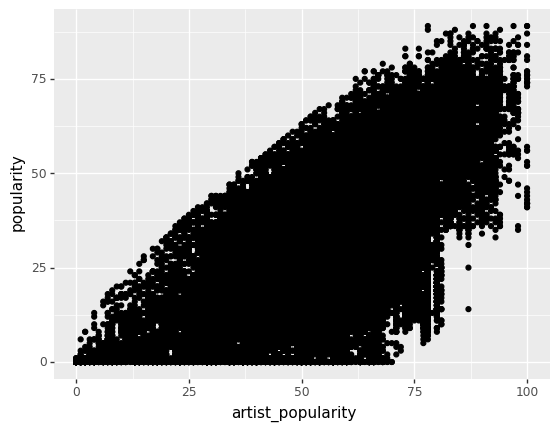

<ggplot: (314219073)>

In [10]:
ggplot(df, aes(y=df.popularity, x=df.artist_popularity)) + geom_point()

The popularity is also highly influenced by genre of the song. Certain genres are highly popular and lead to more hit songs.

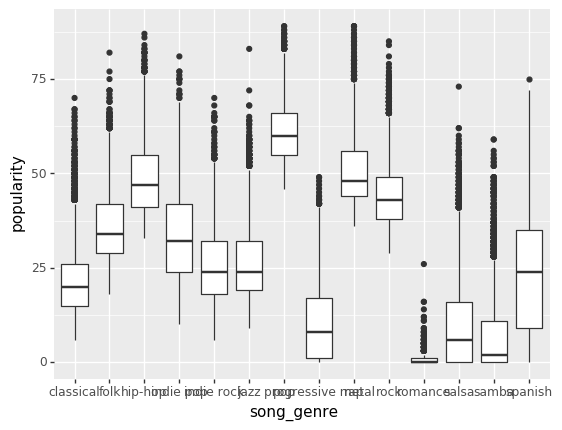

<ggplot: (314274213)>

In [11]:
ggplot(df, aes(y=df.popularity, x= (df.song_genre))) + geom_boxplot()

As can be seen the boxplot below, mode does not seem to affect the popularity of the songs

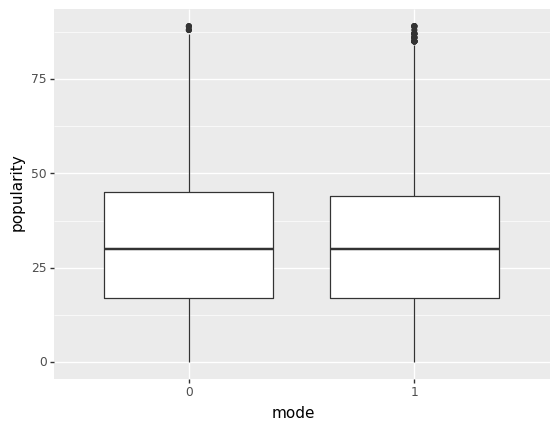

<ggplot: (325282265)>

In [107]:
df['mode'] = np.where(df['mode']==0, '0', '1')
ggplot(df, aes(y=df.popularity, x=(df['mode']) )) + geom_boxplot()

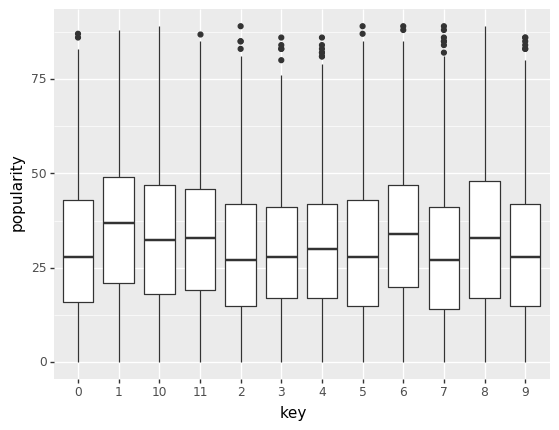

<ggplot: (314221577)>

In [108]:
df['key'] = df['key'].apply(str)
ggplot(df, aes(y=df.popularity, x= df['key'])) + geom_boxplot()


Visually, there doesn't seem to be any affect of song duration on popularity

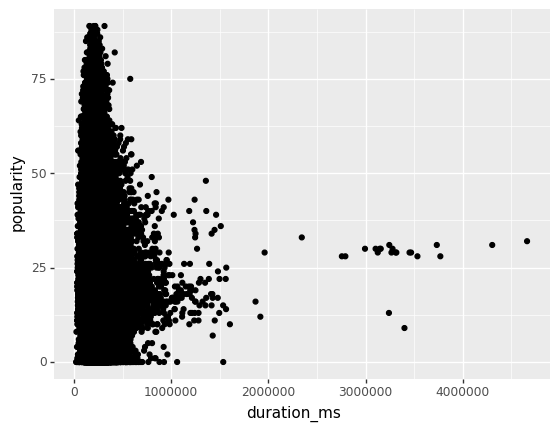

<ggplot: (319043461)>

In [14]:
ggplot(df, aes(y=df.popularity, x= (df.duration_ms))) + geom_point()

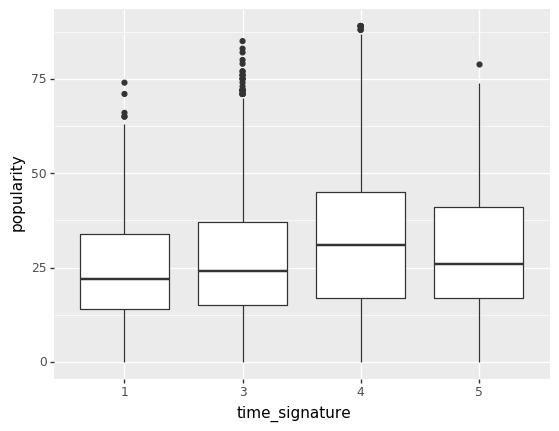

<ggplot: (318986701)>

In [109]:
df.time_signature = df.time_signature.apply(str)
ggplot(df, aes(y=df.popularity, x= (df.time_signature))) + geom_boxplot()


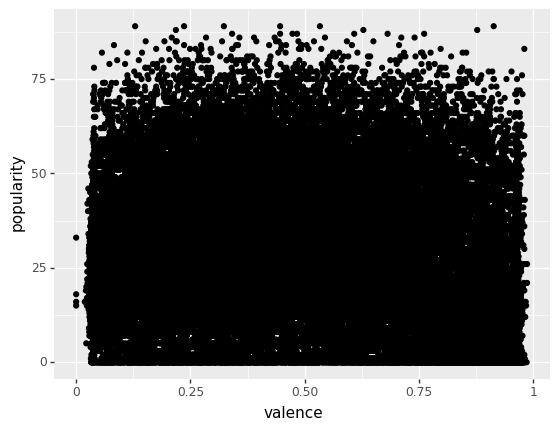

<ggplot: (321696617)>

In [16]:
ggplot(df, aes(y=df.popularity, x= df.valence)) + geom_point()

## Feature Engineering

In [110]:
# normalizing all the numerical fewtures
features = df
features.liveness = np.where(features.liveness<0.5,0,1)
features.instrumentalness = np.where(features.instrumentalness<0.2, 0,1)
features.energy = (features.energy-np.mean(features.energy))/np.std(features.energy)
features.acousticness = (features.acousticness - np.mean(features.acousticness))/np.std(features.acousticness)
features.danceability = (features.danceability - np.mean(features.danceability))/np.std(features.danceability)

features.loudness = (features.loudness - np.mean(features.loudness))/np.std(features.loudness)

features['valence_sq'] = np.square(features.valence)
features.valence = (features.valence - np.mean(features.valence))/np.std(features.valence)
features.speechiness = (features.speechiness - np.mean(features.speechiness))/np.std(features.speechiness)
features.tempo = (features.tempo - np.mean(features.tempo))/np.std(features.tempo)
features.time_signature = (features.time_signature)



In [111]:
features['duration_ms_1'] = pd.cut(features.duration_ms, [0,200000, 400000, np.Inf], labels=[1,2,3])
features['artist_popularity_1'] = np.where(features.artist_popularity<38,0,features.artist_popularity)

features['artist_popularity'] = (features.artist_popularity - np.mean(features.artist_popularity))/np.std(features.artist_popularity)
features['artist_popularity_1'] = (features.artist_popularity_1 - np.mean(features.artist_popularity_1))/np.std(features.artist_popularity_1)
features['artist_pop_dance'] = features.artist_popularity_1 * features.danceability


In [112]:
#convert date into day, month, year
from datetime import datetime

def to_datetime(x):
    try: 
        datetime_object = datetime.strptime(x,'%Y-%m-%d')
    except:
        return (np.nan,np.nan, 2018)
    return (datetime_object.day, datetime_object.month, datetime_object.year)

def get_date(x):
    return to_datetime(x)[0]

def get_month(x):
    return to_datetime(x)[1]

def get_year(x):
    return to_datetime(x)[2]

features['release_day'] = features.release_date.apply(get_date)
features['release_month'] = features.release_date.apply(get_month)
features['release_year'] = features.release_date.apply(get_year)

In [154]:
features.loc[np.isnan(features.release_day), 'release_day'] = np.nanmedian(features.release_day)
features.loc[np.isnan(features.release_month), 'release_month'] = np.nanmedian(features.release_month)


In [114]:
np.isnan(features.release_day).sum()

0

In [155]:
# convert categorical features into multiple columns, and drop features unique to each entry

from sklearn.preprocessing import OneHotEncoder

categorical_features = ['key', 'mode', 'release_month', 'release_year', 'song_genre']
numerical_features = ['hit', 'duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                      'loudnes', 'speechiness', 'tempo_norm', 'artist_popularity_1', 'valence_sq', 'artist_pop_dance']
drop_columns = ['id', 'analysis_url', 'valence', 'tempo', 'time_signature', 'song_name', 'artist_id', 'artist_name', 
               'album_name', 'popularity', 'artist_genres', 'artist_popularity', 'artist_popularity_norm', 
               'full_name', 'release_date', 'popularity_norm']

#ohe = OneHotEncoder(features[categorical_features])
features_new = pd.get_dummies(features, columns=categorical_features, drop_first=True)
features_new.drop(drop_columns, axis=1, inplace=True)
features_new.shape


(47094, 52)

In [141]:
features_new = pd.read_csv('features.csv')
features_new=pd.get_dummies(features_new, columns=['song_genre', 'artist_popularity_1'])

In [156]:
y = features_new.hit
x = features_new.drop('hit', axis=1)

## Modeling

In [143]:
# split data into train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)


First we will try a logistic regression model. As can be seen below, the accuracy on train and test is 0.86.

In [78]:
X_train.columns

Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo_norm',
       'artist_pop_danceability', 'valence_sq', 'duration_ms_1',
       'artist_popularity_1', 'artist_pop_dance', 'release_day', 'key_1',
       'key_10', 'key_11', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'mode_1', 'release_month_2.0',
       'release_month_3.0', 'release_month_4.0', 'release_month_5.0',
       'release_month_6.0', 'release_month_7.0', 'release_month_8.0',
       'release_month_9.0', 'release_month_10.0', 'release_month_11.0',
       'release_month_12.0', 'song_genre_folk', 'song_genre_hip-hop',
       'song_genre_indie pop', 'song_genre_indie rock', 'song_genre_jazz',
       'song_genre_pop', 'song_genre_progressive metal', 'song_genre_rap',
       'song_genre_rock', 'song_genre_romance', 'song_genre_salsa',
       'song_genre_samba', 'song_genre_spanish'],
      dtype='object')

In [157]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight="balanced", C=2, penalty='l2')
logreg.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print(f'train: \n{confusion_matrix(y_train, y_pred_train)}')
print(f'test: \n{confusion_matrix(y_test, y_pred_test)}')



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


Accuracy of logistic regression classifier on train set: 0.86
Accuracy of logistic regression classifier on test set: 0.86
train: 
[[17468  2928]
 [  602  3448]]
test: 
[[11672  1952]
 [  406  2268]]


Next we will try a random forest classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

RFC_Model = RandomForestClassifier(n_estimators=1000, max_features='log2',max_depth=30,criterion='gini',
                                 min_samples_leaf=2)

RFC_Model.fit(X_train, y_train)
RFC_Predict_test = RFC_Model.predict(X_test)
RFC_Predict_train = RFC_Model.predict(X_train)

confusion_matrix_train = confusion_matrix(y_train, RFC_Predict_train)
print('Train:')
print(confusion_matrix_train)

confusion_matrix_test = confusion_matrix(y_test, RFC_Predict_test)
print('Test:')
print(confusion_matrix_test)

Train:
[[20269   127]
 [ 1262  2788]]
Test:
[[13378   246]
 [ 1123  1551]]


In [159]:
pred_test = RFC_Model.predict_proba(X_test)
pred_train = RFC_Model.predict_proba(X_train)
fun = lambda x: 1 if x>=0.45 else 0
RFC_Predict_test_1 = np.array([fun(xi) for xi in pred_test[:,1]])
print("Test: ")
print(confusion_matrix(y_test, RFC_Predict_test_1))
print(f'accuracy test: {accuracy_score(y_test, RFC_Predict_test_1)}')


RFC_Predict_train_1 = np.array([fun(xi) for xi in pred_train[:,1]])
print("Train: ")
print(confusion_matrix(y_train, RFC_Predict_train_1))
print(f'accuracy train: {accuracy_score(y_train, RFC_Predict_train_1)}')

Test: 
[[13309   315]
 [ 1055  1619]]
accuracy test: 0.9159406062093508
Train: 
[[20203   193]
 [ 1003  3047]]
accuracy train: 0.9510758406283236


In [160]:
from sklearn.metrics import classification_report
print("Train:")
print(classification_report(y_train, RFC_Predict_train_1))
print("Test:")
print(classification_report(y_test, RFC_Predict_test_1))

Train:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20396
           1       0.94      0.75      0.84      4050

    accuracy                           0.95     24446
   macro avg       0.95      0.87      0.90     24446
weighted avg       0.95      0.95      0.95     24446

Test:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     13624
           1       0.84      0.61      0.70      2674

    accuracy                           0.92     16298
   macro avg       0.88      0.79      0.83     16298
weighted avg       0.91      0.92      0.91     16298



In [161]:
from sklearn.metrics import roc_auc_score
print('Train:')
print(roc_auc_score(y_train,pred_train[:,1]))
print('Test:')
print(roc_auc_score(y_test,pred_test[:,1]))

Train:
0.9930054428488762
Test:
0.9398890646142954


In [162]:
from sklearn.metrics import f1_score
print(f'Train F1-score: {f1_score(y_train, RFC_Predict_train_1)}')
print(f'Test F1-score: {f1_score(y_test, RFC_Predict_test_1)}')

Train F1-score: 0.8359396433470508
Test F1-score: 0.7026909722222222
